In [ ]:
import pandas as pd

pd.read_csv(r'D:\finaldataset.csv') #File too large for github. Located on local computer.

,backers_count,blurb,converted_pledged_amount,country_displayable_name,currency,current_currency,disable_communication,fx_rate,goal,id,...,usd_pledged,usd_type,month,is_in_post_campaign_pledging_phase,category_name,subcategory,city,year_month,year_month_final,state_changed_month
0,491,Fantasy playing card decks combine the structu...,36513.0,the United States,USD,USD,False,1.000000,10000.0,1293,...,36513.0,international,2024-04-01,NaN,Games,Playing Cards,"Asheville, NC",2023-10,2023-10,2023-10
1,0,A heroine's first day on the job uncovers a te...,NaN,the United States,USD,USD,False,1.000000,0.0,13583,...,NaN,international,2024-04-01,NaN,Comics,Comic Books,"Jersey City, NJ",2024-01,2024-11,2024-01
2,52,A heroine's first day on the job uncovers a te...,1471.0,the United States,USD,USD,False,1.000000,500.0,13583,...,1471.0,domestic,2024-09-01,False,Comics,Comic Books,"Jersey City, NJ",2024-09,2024-11,2024-09
3,130,A heroine's first day on the job uncovers a te...,2869.0,the United States,USD,USD,False,1.000000,500.0,13583,...,2869.0,domestic,2024-11-01,False,Comics,Comic Books,"Jersey City, NJ",2024-11,2024-11,2024-11
4,4,Raising money to help my grandmother recover f...,62.0,the United States,USD,USD,False,1.000000,15000.0,18520,...,62.0,international,2024-04-01,NaN,Music,World Music,"Cleveland, OH",2016-11,2016-11,2016-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256373,31,A Caribbean-infused picture book about encoura...,1631.0,the United States,USD,USD,False,1.000000,1500.0,2147453784,...,1631.0,domestic,2024-11-01,False,Publishing,Children's Books,"Atlanta, GA",2024-10,2024-10,2024-10
256374,53,MOMENTS OF INSIGHT is a project consisting of ...,18758.0,the United States,USD,USD,False,1.000000,18000.0,2147460119,...,18758.0,international,2024-04-01,NaN,Art,Conceptual Art,"Bozeman, MT",2011-08,2011-08,2011-08
256375,46,Two Dogs on a journey of absurdity.,1412.0,the United States,USD,USD,False,1.000000,1200.0,2147462410,...,1412.0,international,2024-04-01,NaN,Comics,Comic Books,"Chicago, IL",2023-06,2023-06,2023-06
256376,0,Would like to be able to photograph dream wedd...,0.0,Canada,CAD,USD,False,0.726831,1500.0,2147466649,...,0.0,international,2024-04-01,NaN,Photography,Fine Art,"Halifax, Canada",2014-07,2014-07,2014-07


In [2]:
df = pd.read_csv(r'D:\finaldataset.csv')

In [3]:
df.head()

,backers_count,blurb,converted_pledged_amount,country_displayable_name,currency,current_currency,disable_communication,fx_rate,goal,id,...,usd_pledged,usd_type,month,is_in_post_campaign_pledging_phase,category_name,subcategory,city,year_month,year_month_final,state_changed_month
0,491,Fantasy playing card decks combine the structu...,36513.0,the United States,USD,USD,False,1.0,10000.0,1293,...,36513.0,international,2024-04-01,NaN,Games,Playing Cards,"Asheville, NC",2023-10,2023-10,2023-10
1,0,A heroine's first day on the job uncovers a te...,NaN,the United States,USD,USD,False,1.0,0.0,13583,...,NaN,international,2024-04-01,NaN,Comics,Comic Books,"Jersey City, NJ",2024-01,2024-11,2024-01
2,52,A heroine's first day on the job uncovers a te...,1471.0,the United States,USD,USD,False,1.0,500.0,13583,...,1471.0,domestic,2024-09-01,False,Comics,Comic Books,"Jersey City, NJ",2024-09,2024-11,2024-09
3,130,A heroine's first day on the job uncovers a te...,2869.0,the United States,USD,USD,False,1.0,500.0,13583,...,2869.0,domestic,2024-11-01,False,Comics,Comic Books,"Jersey City, NJ",2024-11,2024-11,2024-11
4,4,Raising money to help my grandmother recover f...,62.0,the United States,USD,USD,False,1.0,15000.0,18520,...,62.0,international,2024-04-01,NaN,Music,World Music,"Cleveland, OH",2016-11,2016-11,2016-11


In [4]:
df.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'year_month', 'year_month_final', 'state_changed_month'],
      dtype='object')

In [5]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Defining the feature columns and target column
feature_columns = ['country_displayable_name', 'goal', 'month', 'category_name', 'subcategory', 'city']  
target_column = 'state'    

from sklearn.preprocessing import LabelEncoder
# Filtering the data to only include successful and failed projects
df = df[df['state'] != "live"]
df = df[df['state'] != "submitted"]
df = df[df['state'] != "canceled"]
df = df[df['state'] != "started"]
df = df[df['state'] != "suspended"]

# Splitting the data into features and target
X = df[feature_columns]
y = df[target_column]

from sklearn.preprocessing import OrdinalEncoder

# Encoding the categorical feature column using OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
X_encoded = X.copy()
X_encoded[feature_columns] = ordinal_encoder.fit_transform(X[feature_columns])

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Creating and training the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7931958466912292


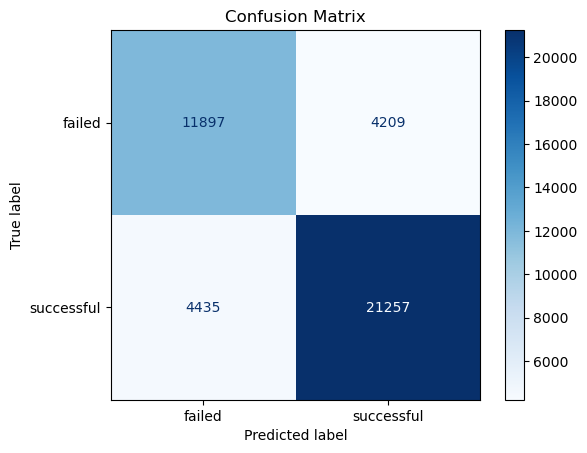

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.inverse_transform(sorted(set(y_test))))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

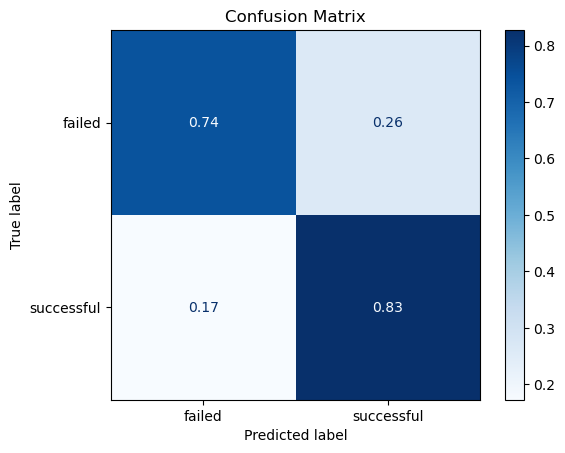

In [7]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.inverse_transform(sorted(set(y_test))))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

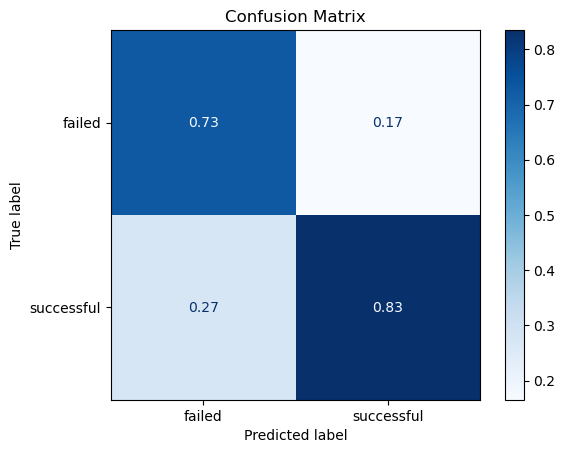

In [8]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='pred')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.inverse_transform(sorted(set(y_test))))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

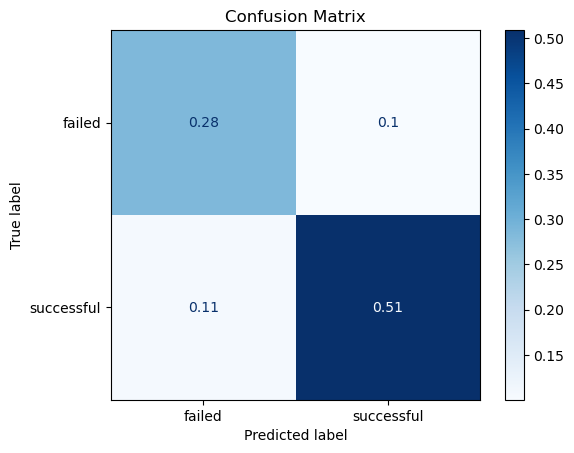

In [9]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.inverse_transform(sorted(set(y_test))))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [28]:
confusion_matrix?

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

In [39]:
# Ensure Graphviz is installed and accessible
!pip install graphviz



In [13]:
import os

In [15]:
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

In [10]:
print(os.environ["PATH"])

c:\Users\jcarb\anaconda3;C:\Users\jcarb\anaconda3;C:\Users\jcarb\anaconda3\Library\mingw-w64\bin;C:\Users\jcarb\anaconda3\Library\usr\bin;C:\Users\jcarb\anaconda3\Library\bin;C:\Users\jcarb\anaconda3\Scripts;C:\Users\jcarb\anaconda3\bin;C:\Users\jcarb\anaconda3\condabin;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files (x86)\Common Files\Intuit\QBPOSSDKRuntime;C:\Program Files\Git\cmd;C:\Users\jcarb\AppData\Local\Microsoft\WindowsApps;C:\Users\jcarb\AppData\Local\Programs\Microsoft VS Code\bin;usr/local/bin


<Figure size 300000x200000 with 0 Axes>

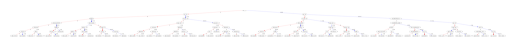

In [17]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(3000, 2000))  
plot_tree(model) 
plt.show()

In [34]:
plot_tree?

Signature:
plot_tree(
    booster: Union[xgboost.core.Booster, xgboost.sklearn.XGBModel],
    *,
    fmap: Union[str, os.PathLike] = '',
    num_trees: Optional[int] = None,
    rankdir: Optional[str] = None,
    ax: Optional[Any] = None,
    with_stats: bool = False,
    tree_idx: int = 0,
    **kwargs: Any,
) -> Any
Docstring:
Plot specified tree.

Parameters
----------
booster :
    Booster or XGBModel instance
fmap: str (optional)
   The name of feature map file
num_trees :

    .. deprecated:: 3.0

rankdir : str, default "TB"
    Passed to graphviz via graph_attr
ax : matplotlib Axes, default None
    Target axes instance. If None, new figure and axes will be created.

with_stats :

    .. versionadded:: 3.0

    See :py:func:`to_graphviz`.

tree_idx :

    .. versionadded:: 3.0

    See :py:func:`to_graphviz`.

kwargs :
    Other keywords passed to :py:func:`to_graphviz`

Returns
-------
ax : matplotlib Axes
File:      c:\users\jcarb\anaconda3\lib\site-packages\xgboost\plotting.p